# Author: Ankit Kumar


# Exploratory Data Analysis - Sports

# Objective: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Reading Data File

In [2]:
#### deliveries dataset ####
deliveries=pd.read_csv("C:\\Users\\ankit\\Downloads\\Indian Premier League (2)\\deliveries.csv")

#### matches dataset ####
matches=pd.read_csv("C:\\Users\\ankit\\Downloads\\Indian Premier League (2)\\matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Feature Engineering

In [5]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [6]:
deliveries.shape

(179078, 21)

In [7]:
deliveries.drop(columns=["player_dismissed","dismissal_kind","fielder"],inplace=True)

In [8]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
matches.shape

(756, 18)

In [11]:
matches.drop(columns=["umpire3"],inplace=True)

# Exploratory Data Analysis

Text(0.5, 1.0, 'Total No. Of Matches per Season')

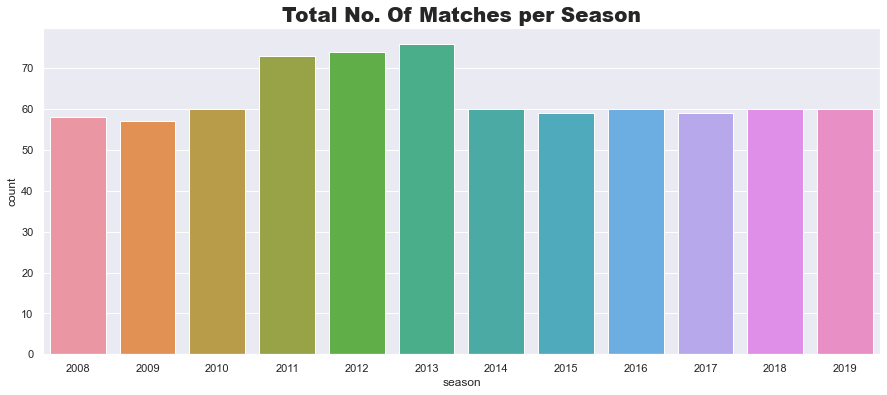

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x="season", data=matches)
plt.title("Total No. Of Matches per Season",fontweight=1000,fontsize = 20)

<AxesSubplot:title={'center':'Total No. Of Matches Winning By Each Team'}, xlabel='winner', ylabel='count'>

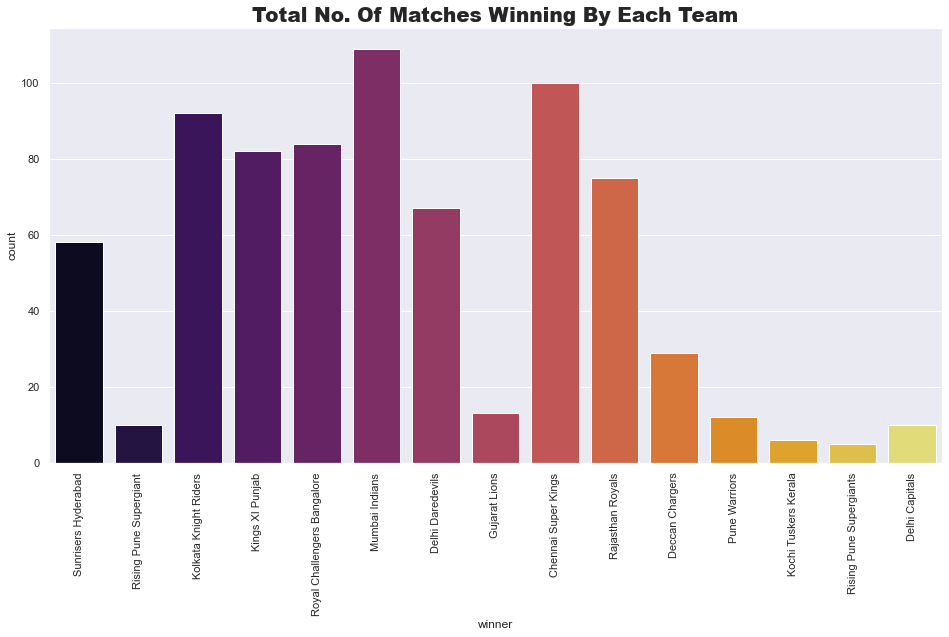

In [49]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Total No. Of Matches Winning By Each Team",fontweight=1000,fontsize = 20)
sns.countplot(x="winner", data=matches, palette="inferno")


Text(0, 0.5, 'Count')

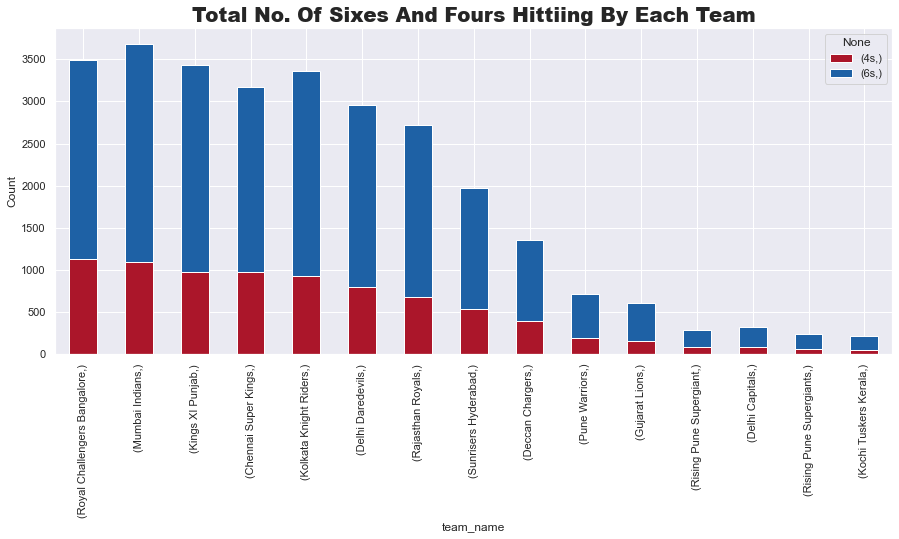

In [48]:
sixes = deliveries[deliveries['batsman_runs'] == 6]['batting_team'].value_counts().reset_index()
fours = deliveries[deliveries['batsman_runs'] == 4]['batting_team'].value_counts().reset_index()
scores = sixes.merge(fours,left_on = 'index', right_on = 'index')
scores.columns = [['team_name','4s','6s']]
sns.set()
scores.set_index('team_name').plot(kind = 'bar',stacked = True, colormap=ListedColormap(sns.color_palette("RdBu", 10)),  figsize=(15,6))
plt.title("Total No. Of Sixes And Fours Hittiing By Each Team",fontweight=1000,fontsize = 20)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

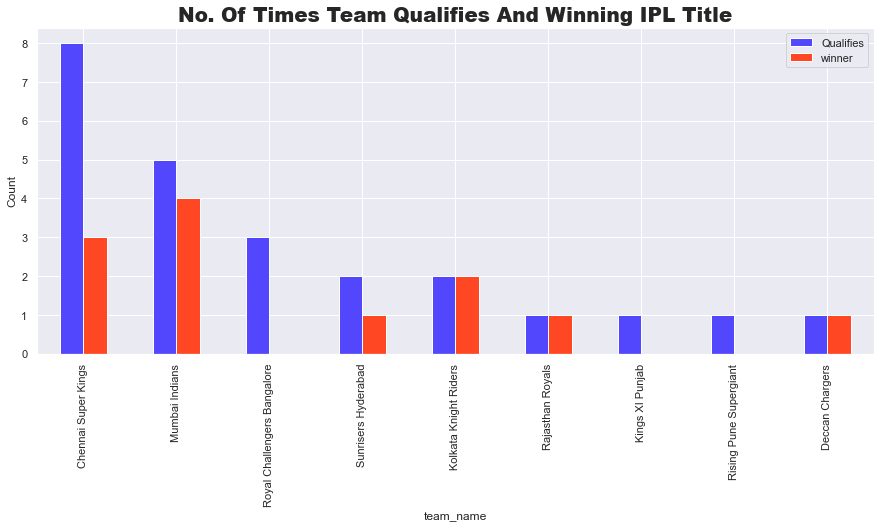

In [46]:
final_list = matches.drop_duplicates(subset=['season'],keep = 'last')
team_names = pd.concat([final_list['team1'],final_list['team2']]).value_counts().reset_index()
team_names.columns = ['team_name','Qualifies']
final_winners_count = final_list['winner'].value_counts().reset_index()
team_names = team_names.merge(final_winners_count,left_on = 'team_name',right_on = 'index', how = 'outer')
team_names.drop(['index'],inplace = True,axis = 1)
team_names['winner'].fillna(0,inplace = True)
sns.set()
team_names.set_index('team_name').plot(kind = 'bar',colormap=ListedColormap(sns.color_palette("rainbow", 10)),  figsize=(15,6))
plt.title("No. Of Times Team Qualifies And Winning IPL Title",fontweight=1000,fontsize = 20)
plt.ylabel("Count")

In [44]:
man_of_match = matches.groupby('player_of_match')[['id']].count()
man_of_match = man_of_match.sort_values('id',ascending = False).head(10)
man_of_match.rename(columns = {'id':'Total_Awards'},inplace= True)
man_of_match

,Total_Awards
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


Text(0, 0.5, 'No. of Awards')

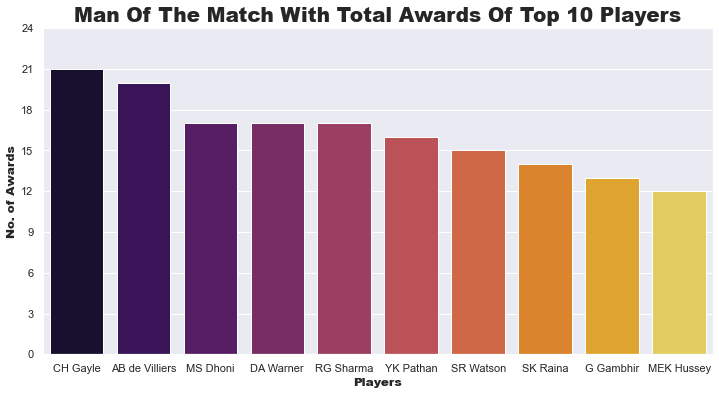

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x=man_of_match.index,y=man_of_match.Total_Awards, palette="inferno")
plt.title("Man Of The Match With Total Awards Of Top 10 Players",fontweight=1000, fontsize = 20)
plt.xticks(rotation=360)
plt.yticks(ticks = np.arange(0,25,3))
plt.xlabel('Players',fontweight=1000)
plt.ylabel('No. of Awards',fontweight=1000)


In [75]:
city_wise_host_matches = matches.groupby("city")[['id']].count()
city_wise_host_matches = city_wise_host_matches.sort_values("id",ascending = False).reset_index()
city_wise_host_matches.rename (columns = {'id':'no_of_hosted_matches'},inplace = True)
city_wise_host_matches.head()

,city,no_of_hosted_matches
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64


<AxesSubplot:title={'center':'Number of matches hosted in each City'}, xlabel='city', ylabel='no_of_hosted_matches'>

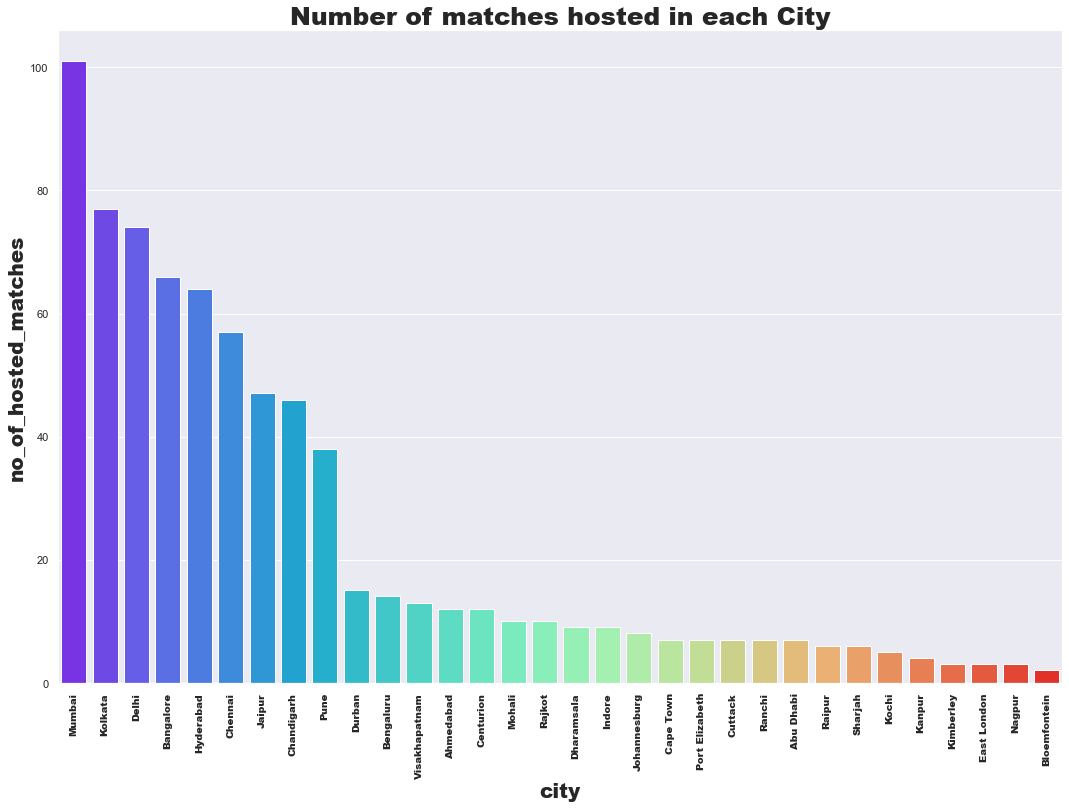

In [20]:
plt.figure(figsize = (18,12))
plt.title("Number of matches hosted in each City",fontweight = 1000,fontsize = 25)
plt.xlabel("City",fontweight = 1000,fontsize = 20)
plt.ylabel("No of Hosted matches",fontweight = 1000,fontsize = 20)
plt.xticks(rotation = 90,fontweight = 1000,fontsize =10)
sns.barplot(x ='city' , y = 'no_of_hosted_matches',data = city_wise_host_matches, palette="rainbow")


In [21]:
finalist = matches.groupby("season").tail(1).sort_values("season").reset_index()
finalist

,index,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
1,173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
2,233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
3,306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
4,380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
5,456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
6,516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
7,575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
8,635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
9,58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [22]:
winner_team = finalist.groupby('winner')[['id']].count()
winner_team = winner_team.sort_values("id",ascending = False)
winner_team.rename(columns = {'id':'Title_Holders'},inplace = True)
winner_team

,Title_Holders
winner,
Mumbai Indians,4
Chennai Super Kings,3
Kolkata Knight Riders,2
Deccan Chargers,1
Rajasthan Royals,1
Sunrisers Hyderabad,1


In [23]:
winner_team = winner_team.reset_index()

<AxesSubplot:title={'center':'Total Winning Title Holder Team'}, xlabel='winner', ylabel='Title_Holders'>

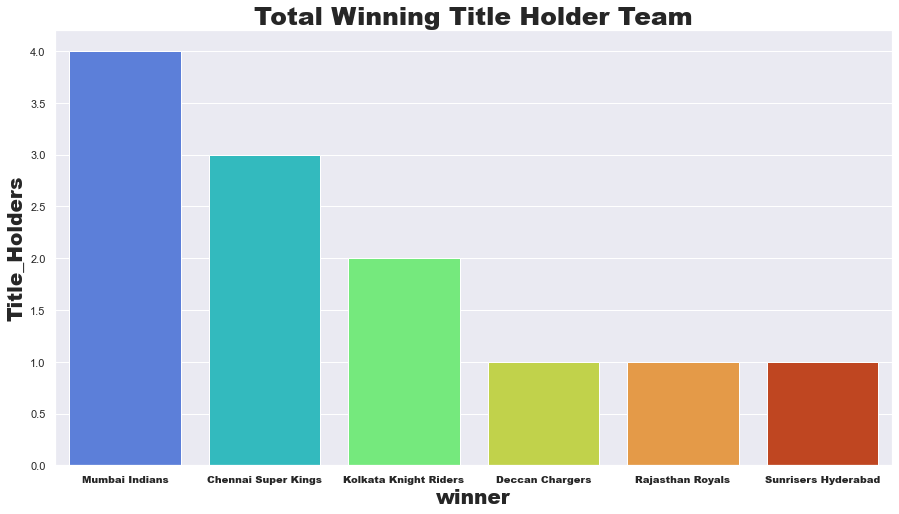

In [57]:
plt.figure(figsize = (15,8))
plt.title("Total Winning Title Holder Team",fontweight = 1000,fontsize = 25)
plt.xlabel("Team",fontweight = 1000,fontsize = 20)
plt.ylabel("No. of time winner",fontweight = 1000,fontsize = 20)
plt.xticks(rotation = 0,fontweight = 1000,fontsize =10)
sns.barplot(x ='winner' , y = 'Title_Holders',data = winner_team, palette="turbo")

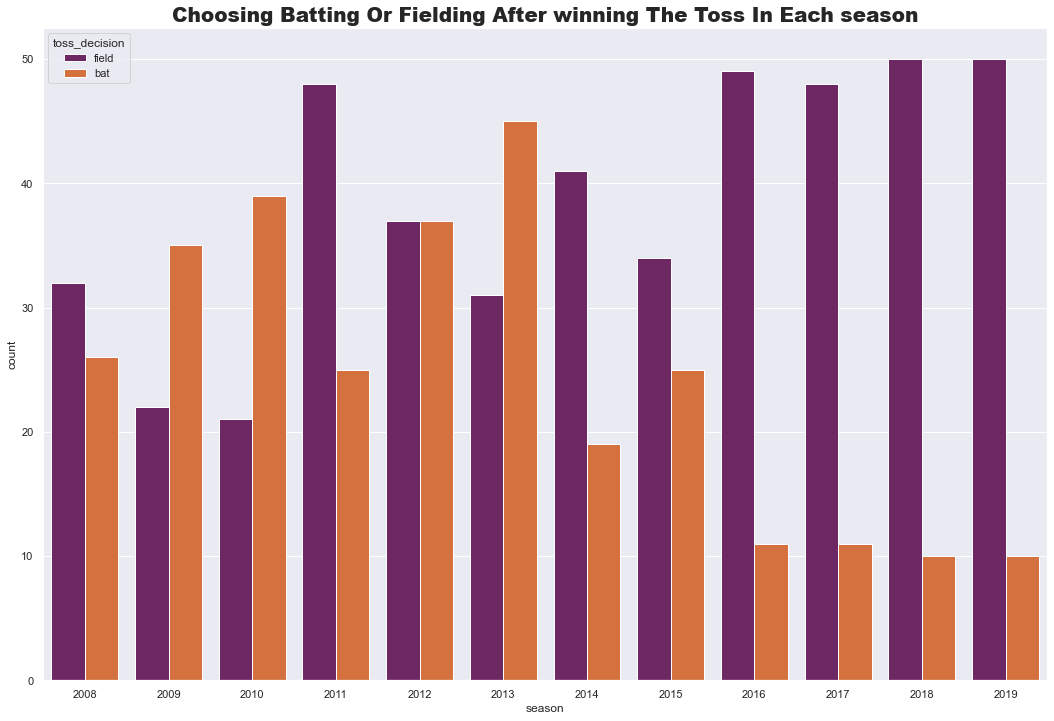

In [41]:
plt.subplots(figsize=(18,12))
sns.countplot(x="season", hue="toss_decision", data=matches, palette="inferno")
plt.title("Choosing Batting Or Fielding After winning The Toss In Each season",fontweight=1000,fontsize = 20)
plt.show()

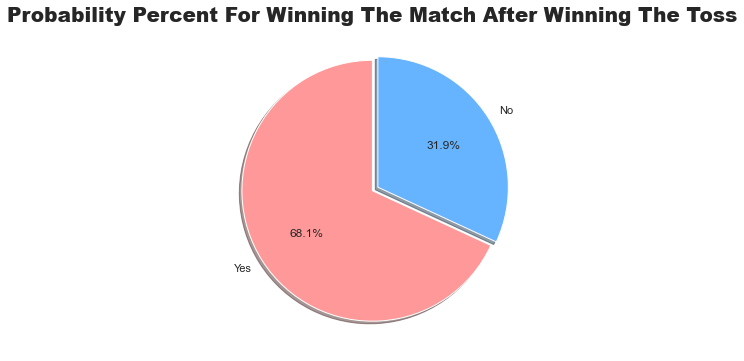

In [40]:
df=matches[matches['toss_winner']==matches['winner']]
slicer=[len(df),(577-len(df))]
labels=['Yes','No']
plt.title("Probability Percent For Winning The Match After Winning The Toss",fontweight=1000,fontsize = 20)
plt.pie(slicer,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['#ff9999','#66b3ff'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [29]:
umpire1_df = matches['umpire1'].value_counts()
umpire2_df = matches['umpire2'].value_counts()

In [30]:
umpires_df = pd.concat([umpire1_df, umpire2_df], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
KN Anantapadmanabhan,NaN,3.0
K Srinivasan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [32]:
umpire_service = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_service.iteritems():
    temp_df = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df, ignore_index=True) 

In [74]:
total= umpire_df.sort_values('matches', ascending=False).head(10)

<AxesSubplot:title={'center':'Top 10 Umpire Services in Total Matches'}, xlabel='umpire', ylabel='matches'>

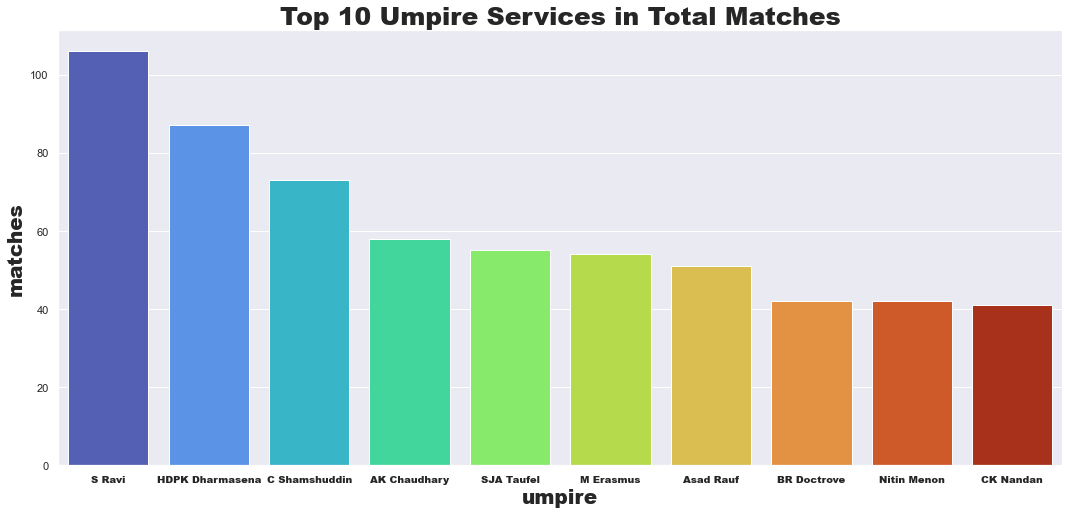

In [79]:
plt.figure(figsize = (18,8))
plt.title("Top 10 Umpire Services in Total Matches",fontweight = 1000,fontsize = 25)
plt.xlabel("umpire",fontweight = 1000,fontsize = 20)
plt.ylabel("matches",fontweight = 1000,fontsize = 20)
plt.xticks(rotation = 0,fontweight = 1000,fontsize =10)
sns.barplot(x ='umpire' , y = 'matches',data = total, palette="turbo")

In [62]:
chasing_vic_ = matches['win_by_wickets'].value_counts()
chasing_victory = pd.DataFrame(columns=['Victory_margin', 'Instances'])

for items in chasing_vic_.iteritems():    
    df = pd.DataFrame({
        'Victory_margin': [items[0]],
        'Instances': [items[1]]
    })
    chasing_victory = chasing_victory.append(df, ignore_index=True)
    
chasing_vict_df = chasing_victory.drop([0])  # first row contining victory margin = 0
chasing_vict_df

,Victory_margin,Instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


<AxesSubplot:title={'center':'IPL victories when chasing a Totals'}, xlabel='Victory_margin', ylabel='Instances'>

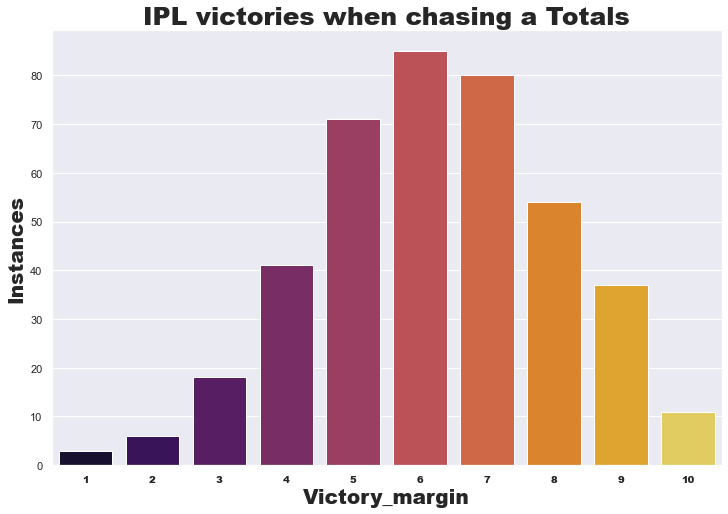

In [67]:
plt.figure(figsize = (12,8))
plt.title("IPL victories when chasing a Totals",fontweight = 1000,fontsize = 25)
plt.xlabel("Victory_margin",fontweight = 1000,fontsize = 20)
plt.ylabel("Instances",fontweight = 1000,fontsize = 20)
plt.xticks(rotation = 0,fontweight = 1000,fontsize =10)
sns.barplot(x ='Victory_margin' , y = 'Instances',data = chasing_vict_df, palette="inferno")